### **Cleaning & Exploratory Data Analysis**

In [2]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_colwidth = 350

In [3]:
# read the data
data = pd.read_csv('../data/data_reddit.csv')

In [4]:
# look at the data
data.shape

(20600, 4)

In [5]:
# first 3 rows
data.head(3)

,subreddit,selftext,title,created_utc
0,books,"And it's not because I'm a slow reader - quite the contrary. But this was a book worth taking my time over.\n\nI think it's mostly to do with the fact that I knew beforehand how the story of this remarkable ship ends, and I was putting off reading about the details.\n\nCouple this with the wonderful and charming way in which Palin (of Monty Pyt...","It's taken me all year, but I finally finished ""Erebus: The Story of a Ship"" by Michael Palin",1577836753
1,books,"Those that scroll through reddit AND read so many books, some of you read sooooo many, how do you find the time?",How do you find the time?,1577835261
2,books,What’s everyone’s reading goals for next year? I’d like to read 50 books and read more fiction.,2020 reading goals,1577834790


In [6]:
# check how many NA's we have
data.isnull().sum()

subreddit         0
selftext       4444
title             0
created_utc       0
dtype: int64

In [7]:
# the missing values seem to be posts that were submitted with only a title
data[data['selftext'].isnull()].head()

,subreddit,selftext,title,created_utc
15,books,NaN,Independent bookstore in Boston gets full liquor license!,1577830159
24,books,NaN,"Seeking out the latest best seller is no more a hassle with book subscription boxes. If you are a sucker for comic books, a fan of fiction, romance or fantasy, these boxes have a genre for everyone to curl up with!",1577825932
25,books,NaN,"KONTAKT TV: ""Ukraine in the News with Tania Stech,"" Oct. 31st, 2019 (New...",1577825434
31,books,NaN,Looking for what to read next? Look at some ideas,1577822969
32,books,NaN,"A year after Denver Public Library ended late fees, patrons — and their books — are returning: Officials say 35% of patrons with fines who had stopped using Denver Public Library services have re-engaged",1577822324


In [8]:
# check how many [removed] we have under selftext
data[data['selftext']=='[removed]'].shape

(6110, 4)

In [9]:
# One possibility is to train the models only on the titles. The model would train on fewer data points 
# in terms of number of words, because the titles are more concise than the text of the post.

# A second option is to train the models only on the text, removing the missing values and the 'removed' 
# posts. This will result in fewer data points (specifically, 4444+6110 = 10,554 data points, more than half
# the data).

# A third option (proposed by Noah) is to combine the text and the title together into a single string of 
# text, and train the model on that combined text. This way, we remain with the entire data frame. In this
# analysis, I will start out with this option and then explore also the second one mentioned above.

In [10]:
# take all the 'removed' posts and replace the '[removed]' input with NaN, so that when we combine the 
# two columns we don't have an extra word there
data['selftext'] = [np.nan if a=='[removed]' else a for a in data['selftext']]

In [11]:
# combine the two columns into one column
# the NA needs to be filled with an empty string, so that we can combine it with the title
data['combined_text'] = data['selftext'].fillna('') + ' ' + data['title']

---

### Comparing the length of title and text in the two subreddits

In [12]:
# create a column with the number of words in each text
data['word_count'] = [len(data.loc[i, 'combined_text'].split()) for i in range(data.shape[0])]

# create a column with the number of characters in each text
data['char_count'] = [len(data.loc[i,'combined_text']) for i in range(data.shape[0])]

In [13]:
data.head(3)

,subreddit,selftext,title,created_utc,combined_text,word_count,char_count
0,books,"And it's not because I'm a slow reader - quite the contrary. But this was a book worth taking my time over.\n\nI think it's mostly to do with the fact that I knew beforehand how the story of this remarkable ship ends, and I was putting off reading about the details.\n\nCouple this with the wonderful and charming way in which Palin (of Monty Pyt...","It's taken me all year, but I finally finished ""Erebus: The Story of a Ship"" by Michael Palin",1577836753,"And it's not because I'm a slow reader - quite the contrary. But this was a book worth taking my time over.\n\nI think it's mostly to do with the fact that I knew beforehand how the story of this remarkable ship ends, and I was putting off reading about the details.\n\nCouple this with the wonderful and charming way in which Palin (of Monty Pyt...",197,1058
1,books,"Those that scroll through reddit AND read so many books, some of you read sooooo many, how do you find the time?",How do you find the time?,1577835261,"Those that scroll through reddit AND read so many books, some of you read sooooo many, how do you find the time? How do you find the time?",28,138
2,books,What’s everyone’s reading goals for next year? I’d like to read 50 books and read more fiction.,2020 reading goals,1577834790,What’s everyone’s reading goals for next year? I’d like to read 50 books and read more fiction. 2020 reading goals,20,114


In [14]:
# look at the length of the combined texts in the subreddit books
print(data[data['subreddit']=='books']['word_count'].describe())
print('--------')
print(data[data['subreddit']=='books']['char_count'].describe())

count    10300.000000
mean        69.512136
std        155.515973
min          1.000000
25%          7.000000
50%         14.000000
75%         92.000000
max       6294.000000
Name: word_count, dtype: float64
--------
count    10300.000000
mean       391.664660
std        896.592643
min          2.000000
25%         43.000000
50%         79.000000
75%        505.000000
max      33742.000000
Name: char_count, dtype: float64


In [15]:
# look at the length of the combined texts in the subreddit datascience
print(data[data['subreddit']=='datascience']['word_count'].describe())
print('--------')
print(data[data['subreddit']=='datascience']['char_count'].describe())

count    10300.000000
mean        84.759417
std        121.799073
min          1.000000
25%         10.000000
50%         45.000000
75%        117.000000
max       2166.000000
Name: word_count, dtype: float64
--------
count    10300.000000
mean       512.511262
std        748.892437
min          3.000000
25%         62.000000
50%        283.000000
75%        705.250000
max      14633.000000
Name: char_count, dtype: float64


---

### Looking at the distributions of title and text length

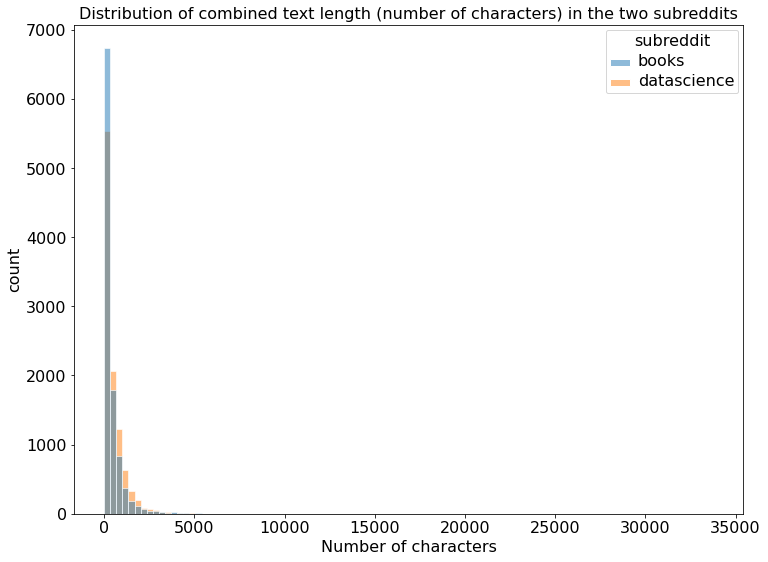

In [19]:
plt.figure(figsize=(12,9))
ax = sns.histplot(data=data, x='char_count', hue='subreddit', bins=100, edgecolor='white', alpha=0.5);

plt.setp(ax.get_legend().get_texts(), fontsize='16')
plt.setp(ax.get_legend().get_title(), fontsize='16')

plt.xticks(fontsize=16);
plt.yticks(fontsize=16);
plt.xlabel('Number of characters', fontsize=16);
plt.ylabel('count', fontsize=16);
plt.title('Distribution of combined text length (number of characters) in the two subreddits', fontsize=16);

plt.savefig('../images/char_count.jpeg');

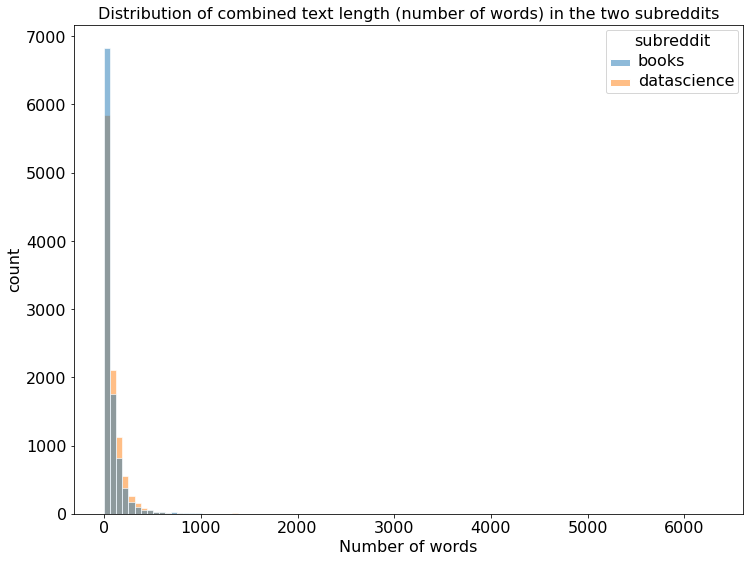

In [21]:
plt.figure(figsize=(12,9))
ax = sns.histplot(data=data, x='word_count', hue='subreddit', bins=100, edgecolor='white', alpha=0.5);

plt.setp(ax.get_legend().get_texts(), fontsize='16')
plt.setp(ax.get_legend().get_title(), fontsize='16')

plt.xticks(fontsize=16);
plt.yticks(fontsize=16);
plt.xlabel('Number of words', fontsize=16);
plt.ylabel('count', fontsize=16);
plt.title('Distribution of combined text length (number of words) in the two subreddits', fontsize=16);

plt.savefig('../images/word_count.jpeg');

---

### Looking at the most commong tri-grams

In [112]:
# import count vectorizer
from sklearn.feature_extraction.text import CountVectorizer

# instantiate a count vectorizer
cvec = CountVectorizer(ngram_range=(3,3), max_features=10000)

In [113]:
# vectorized text data frame for books
cvec_books = pd.DataFrame(cvec.fit_transform(data[data['subreddit']=='books']['combined_text']).todense(), 
                          columns=cvec.get_feature_names())

# vectorized text data frame for data science
cvec_ds = pd.DataFrame(cvec.fit_transform(data[data['subreddit']=='datascience']['combined_text']).todense(), 
                          columns=cvec.get_feature_names())

In [114]:
# 20 most common tri-grams for books
cvec_books.sum().sort_values(ascending = False).head(20)

of the book           403
one of the            302
what do you           218
do you think          204
in the book           187
the book is           167
some of the           166
at the end            164
www youtube com       151
https www youtube     151
the end of            150
the book and          145
how do you            141
youtube com watch     140
this book is          139
want to read          139
the first book        137
wikipedia org wiki    135
the first time        132
the book was          121
dtype: int64

In [115]:
# 20 most common tri-grams for datascience
cvec_ds.sum().sort_values(ascending = False).head(20)

in data science      1048
for data science      507
data science and      483
of data science       402
would like to         376
to data science       337
the data science      334
be able to            277
as data scientist     270
into data science     245
https github com      235
do you think          212
thanks in advance     200
what are the          199
www reddit com        197
https www reddit      197
how do you            195
what is the           192
and data science      192
on how to             181
dtype: int64

---

In [100]:
# save the subsetted data frame for modeling
data.to_csv('../data/data_reddit_combined.csv', index=False)

---